# Analyze output of .hdf5 files of hadrons code
June 12, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import subprocess as sp
import os 
import glob
import pandas as pd
import itertools

In [3]:
import gvar as gv
import h5py

In [4]:
%matplotlib notebook

m_f = 0.02 \
Want m_res < 10^-3

$ m_{phys} = m_f + m_{res} $ 

In [5]:
def f_extract_wilson_flow(fname):
    
    keys=['flow_time','Plaq_density','Clover_density','top_charge','plaq','rect','r_ploop','i_ploop']
    flow_vars=dict.fromkeys(keys)

    with h5py.File(fname) as hf:
        for idx,key in enumerate(keys):
            print(type(hf['FlowObservables']['FlowObservables_%s'%(idx)]['data']))
            flow_vars[key]=np.array(hf['FlowObservables']['FlowObservables_%s'%(idx)]['data'])
    
    return flow_vars


## Hadrons code results

In [6]:

fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_aug31_su3_wflow_comparison/runs/meas1_compare_wflow_su3/090123_120747-tioga/Wflow_.144.h5'


In [7]:
flow_vars=f_extract_wilson_flow(fname)

<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


<IPython.core.display.Javascript object>


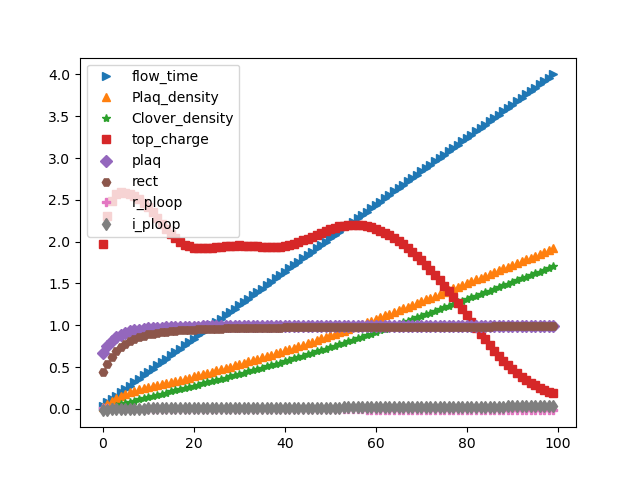

In [8]:
# Plot Wilson flow results

keys=['flow_time','Plaq_density','Clover_density','top_charge','plaq','rect','r_ploop','i_ploop']

plt.figure()
for key,marker in zip(keys,itertools.cycle('>^*sDHPdpx_')):
    plt.plot(flow_vars[key],linestyle='',marker=marker,label=key)
    
plt.legend(loc='best')

## Oliver's Wflow code

In [9]:
f2='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_aug31_su3_wflow_comparison/runs/meas1_compare_wflow_su3/gauge_configs/config1_16_8_su3/WilsonFlow_144_0.04.out'

In [10]:
def f_get_df_wflow(strg,f2):
    
    cmd='grep "{0}" {1}'.format(strg,f2)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string

    df=pd.DataFrame([])
    
    for t in op:  
        dict1={}
        a1=t.split(' ')
        a1=[i for i in a1 if i] # Drop null strings

        for i in range(1,len(a1),2):
            # First entry is string name, drop it.
            # Then jump in steps of 2 to get observable name and value
            dict1[a1[i]]=a1[i+1]
    #     print(dict1)
        df=pd.concat([df,pd.DataFrame(dict1,index=[df.shape[0]+1])])
    
    
    return df

df1=f_get_df_wflow('^wflowX',f2) # the ^ is to catch only when occuring at the start of the sentence
df2=f_get_df_wflow('^wflowP',f2)
df3=f_get_df_wflow('^WFLOW',f2)
# df.astype(np.float128)

# df1.merge(df2,on=['t','n','step'],how='inner',suffixes=('_1','_2'))

df_merged=reduce(lambda a,b: pd.merge(a,b,on=['t','n','step'],how='inner'), [df1,df2,df3])

In [11]:
df_merged

,t,n,step,t_P,s_P,t_R,s_R,t_E,s_E,polyXre,...,polyTre,polyTim,action,t2P,P,R,t2E,E,Q,Q2
0,0.00000,0,0.00000,5.6616099321946611e-01,5.6832469794718521e-01,3.2772359216485725e-01,3.3068268857248179e-01,2.2676138213810457e+00,2.2622025999514115e+00,4.7937168967936298e-03,...,7.2567443577641133e-03,-8.1074607113567742e-03,2.5525055584666051e+05,0.0000000000000000e+00,5.6724284558332561e-01,3.2920314036866949e-01,0.0000000000000000e+00,2.2649082106662286e+00,1.5674909788,715.2540783585
1,0.04000,1,0.04000,6.7292712226571538e-01,6.7475638871335386e-01,4.3681633252471752e-01,4.3971432268021160e-01,2.1388732486575677e+00,2.1322269918939352e+00,9.7668383744972560e-03,...,7.3618032868161881e-03,-8.3180837991773202e-03,1.9237596041014075e+05,1.0781468087832555e-03,6.7384175548953462e-01,4.3826532760246456e-01,3.4168801924412025e-03,2.1355501202757514e+00,1.9822427154,638.9085673120
2,0.08000,2,0.04000,7.5445659696441414e-01,7.5591960822775250e-01,5.3591598451323974e-01,5.3849173291529417e-01,1.9563677102359234e+00,1.9480479205770753e+00,1.4465211798998736e-02,...,6.8991689864378010e-03,-7.5176702761152779e-03,1.4439593257436785e+05,4.8332038566149338e-03,7.5518810259608338e-01,5.3720385871426701e-01,1.2494130018601595e-02,1.9522078154064992e+00,2.3046370877,538.4596728687
3,0.12000,3,0.04000,8.1427762659456837e-01,8.1540331675668987e-01,6.1942225767068815e-01,6.2153375024304802e-01,1.7553855814040091e+00,1.7452779708599078e+00,1.7546122865559819e-02,...,6.2609710976726874e-03,-6.0898068466632106e-03,1.0921153363439375e+05,1.1733702792129059e-02,8.1484047167562912e-01,6.2047800395686814e-01,2.5204777576300200e-02,1.7503317761319583e+00,2.4910118218,438.7472169197
4,0.16000,4,0.04000,8.5746881479829684e-01,8.5830331269372151e-01,6.8682711309885580e-01,6.8843326471468458e-01,1.5601531554396946e+00,1.5483831106494068e+00,1.8965112273141693e-02,...,5.7074303712788691e-03,-4.3907414726756730e-03,8.3822210337073833e+04,2.1961883231897836e-02,8.5788606374600918e-01,6.8763018890677019e-01,3.9789264205940499e-02,1.5542681330445507e+00,2.5704774001,352.9694954823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.84000,96,0.04000,9.9661654965111268e-01,9.9648146117129222e-01,9.8731072790154828e-01,9.8678684079370038e-01,1.1421339161083016e-01,1.0582803458247481e-01,2.7002765884502011e-02,...,-1.6113449074043055e-02,3.1885558392789538e-02,2.0354794323430101e+03,1.4694713014191423e+01,9.9654900541120228e-01,9.8704878434762433e-01,1.6223214270379989e+00,1.1002071309665248e-01,0.2824943079,12.1730634615
97,3.88000,97,0.04000,9.9664588586143310e-01,9.9651209581444022e-01,9.8741481854814517e-01,9.8689647000855629e-01,1.1332424864417469e-01,1.0498368481943983e-01,2.6456292401247295e-02,...,-1.6404476757012385e-02,3.2252982689234412e-02,2.0177933080048438e+03,1.5002898759670632e+01,9.9657899083793666e-01,9.8715564427835067e-01,1.6432474767673193e+00,1.0915396673180727e-01,0.2546868121,12.0304147157
98,3.92000,98,0.04000,9.9667450797631019e-01,9.9654200147115135e-01,9.8751662391155159e-01,9.8700378661064292e-01,1.1245141661270153e-01,1.0415663031404457e-01,2.5911583120887722e-02,...,-1.6694812945421512e-02,3.2622085547633364e-02,2.0005327658304145e+03,1.5314281085386735e+01,9.9660825472373071e-01,9.8726020526109715e-01,1.6642429461475758e+00,1.0830402346337306e-01,0.2295993702,11.8899626080
99,3.96000,99,0.04000,9.9670243541411074e-01,9.9657119966973673e-01,9.8761620094685698e-01,9.8710885265510429e-01,1.1159449786428663e-01,1.0334645587300459e-01,2.5369038258273857e-02,...,-1.6984283660736819e-02,3.2992849531848951e-02,1.9836857301524365e+03,1.5628859917965430e+01,9.9663681754192368e-01,9.8736252680098047e-01,1.6853090300633529e+00,1.0747047686864561e-01,0.2069072848,11.7518984323


In [12]:
flow_vars.keys()
# flow_vars['r_ploop']

dict_keys(['flow_time', 'Plaq_density', 'Clover_density', 'top_charge', 'plaq', 'rect', 'r_ploop', 'i_ploop'])

In [13]:
flow_vars['Plaq_density']/(flow_vars['plaq']*np.sqrt(flow_vars['flow_time']))
# flow_vars['Plaq_density']/(flow_vars['plaq']*(flow_vars['flow_time']**2))

array([0.13940005, 0.26406744, 0.34005397, 0.38167132, 0.40235838,
       0.41109879, 0.41343164, 0.41266228, 0.41071408, 0.40866943,
       0.40710453, 0.40629472, 0.40633955, 0.40723873, 0.40893879,
       0.41136163, 0.41442138, 0.41803354, 0.42211873, 0.42660364,
       0.43142085, 0.43650899, 0.44181335, 0.44728669, 0.45288974,
       0.45859128, 0.4643676 , 0.47020183, 0.47608324, 0.48200678,
       0.48797229, 0.49398308, 0.50004405, 0.50615986, 0.512334  ,
       0.51856861, 0.52486494, 0.53122395, 0.53764686, 0.54413527,
       0.55069105, 0.55731588, 0.56401077, 0.57077557, 0.57760873,
       0.58450725, 0.59146687, 0.59848243, 0.60554828, 0.61265869,
       0.61980834, 0.62699255, 0.63420752, 0.64145043, 0.64871933,
       0.65601302, 0.66333082, 0.67067231, 0.6780371 , 0.68542464,
       0.69283407, 0.7002641 , 0.70771299, 0.71517846, 0.72265775,
       0.73014754, 0.73764401, 0.74514282, 0.75263916, 0.76012772,
       0.76760279, 0.77505827, 0.78248776, 0.78988463, 0.79724

In [14]:
df_merged.columns

Index(['t', 'n', 'step', 't_P', 's_P', 't_R', 's_R', 't_E', 's_E', 'polyXre',
       'polyXim', 'polyYre', 'polyYim', 'polyZre', 'polyZim', 'polyTre',
       'polyTim', 'action', 't2P', 'P', 'R', 't2E', 'E', 'Q', 'Q2'],
      dtype='object')

In [15]:
# print('{:.3e}'.format(0.223))
# f"{0.0003509:.2E}"


In [16]:
# flow_vars['plaq'],df_merged.s_P.values[1:]

flow_vars['plaq'],df_merged.s_P.values[1:]

def f_compare_values(c1,c2,plot=False,Title=''):
    
    assert c1 in flow_vars.keys(),"%s not in %s"%(c1,flow_vars.keys())
    assert c2 in df_merged.columns, "%s not in %s"%(c2,df_merged.columns)
    a1=flow_vars[c1]
    a2=df_merged[c2].values[1:]

    print('Labels \t%s\t%s\n'%(c1,c2))
    for i in range(len(a1)):
#         if np.abs(float(a1[i])-float(a2[i]))>1e-15:
        if True:
            print(i,f"{a1[i]:.18e}",a2[i],float(a1[i])-float(a2[i]),(float(a1[i])-float(a2[i]))/(float(a1[i])))
        
        
    
    if plot:
        plt.figure()
#         plt.plot(a1,color='blue',linestyle='',marker='H')
#         plt.plot(a2.astype(float),color='yellow',linestyle='',marker='*')
        plt.plot(np.abs(a1-a2.astype(float)),linestyle='',marker='x')
        plt.ylabel('Deviation between the two approaches')
        plt.xlabel('Wflow time')
        plt.title(Title)
        plt.yscale('log')
        plt.savefig(Title+'.pdf')
        

## Perfect matches

Labels 	r_ploop	polyTre

0 7.361803286816190686e-03 7.3618032868161881e-03 2.6020852139652106e-18 3.534575854023603e-16
1 6.899168986437801895e-03 6.8991689864378010e-03 8.673617379884035e-19 1.2571974098524612e-16
2 6.260971097672676962e-03 6.2609710976726874e-03 -1.0408340855860843e-17 -1.6624163717557844e-15
3 5.707430371278876882e-03 5.7074303712788691e-03 7.806255641895632e-18 1.3677355892379405e-15
4 5.326042466239621145e-03 5.3260424662396194e-03 1.734723475976807e-18 3.2570590395641075e-16
5 5.099297568536432373e-03 5.0992975685364506e-03 -1.8214596497756474e-17 -3.571981484301633e-15
6 4.976577545891761739e-03 4.9765775458917513e-03 1.0408340855860843e-17 2.09146562268543e-15
7 4.911382972720768243e-03 4.9113829727207708e-03 -2.6020852139652106e-18 -5.298070275557698e-16
8 4.871119849196194410e-03 4.8711198491961797e-03 1.474514954580286e-17 3.0270553799319935e-15
9 4.835225844229238019e-03 4.8352258442292441e-03 -6.071532165918825e-18 -1.255687399413845e-15
10 4.7910797858568

<IPython.core.display.Javascript object>


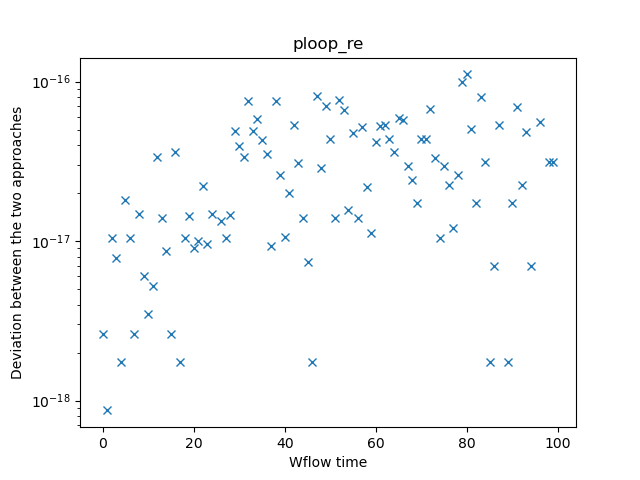

Labels 	i_ploop	polyTim

0 -8.318083799177337576e-03 -8.3180837991773202e-03 -1.734723475976807e-17 2.085484491209829e-15
1 -7.517670276115291823e-03 -7.5176702761152779e-03 -1.3877787807814457e-17 1.8460224109464023e-15
2 -6.089806846663219260e-03 -6.0898068466632106e-03 -8.673617379884035e-18 1.4242844803257693e-15
3 -4.390741472675670394e-03 -4.3907414726756730e-03 2.6020852139652106e-18 -5.92630021639495e-16
4 -2.642283927211301706e-03 -2.6422839272113238e-03 2.211772431870429e-17 -8.370684198971608e-15
5 -9.465983819443876766e-04 -9.4659838194441348e-04 2.5804011705155006e-17 -2.725972513512175e-14
6 6.638018409542121873e-04 6.6380184095419842e-04 1.3769367590565906e-17 2.0743189821185947e-14
7 2.185102412006249394e-03 2.1851024120062624e-03 -1.3010426069826053e-17 -5.9541493333854976e-15
8 3.620120113191100698e-03 3.6201201131910985e-03 2.168404344971009e-18 5.989868504831409e-16
9 4.970231958262208601e-03 4.9702319582621661e-03 4.2500725161431774e-17 8.551054662706672e-15
10 6.2

<IPython.core.display.Javascript object>


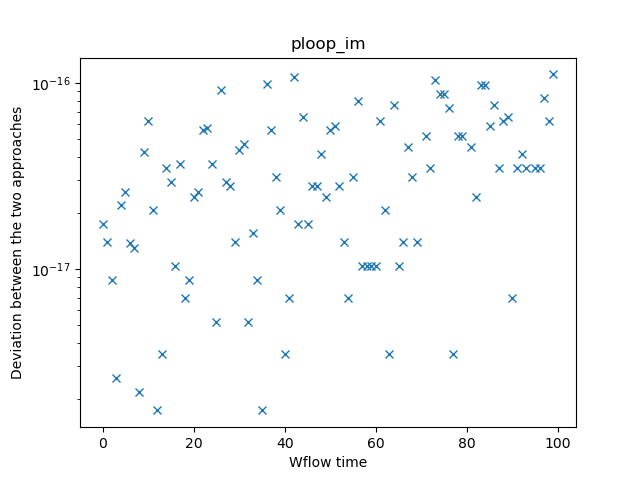

Labels 	plaq	P

0 6.738417554895348438e-01 6.7384175548953462e-01 2.220446049250313e-16 3.2952040017721904e-16
1 7.551881025960835991e-01 7.5518810259608338e-01 2.220446049250313e-16 2.940255602037643e-16
2 8.148404716756293409e-01 8.1484047167562912e-01 2.220446049250313e-16 2.7250070736965376e-16
3 8.578860637460095084e-01 8.5788606374600918e-01 3.3306690738754696e-16 3.8824142443017536e-16
4 8.889217364045260972e-01 8.8892173640452599e-01 1.1102230246251565e-16 1.2489547495100532e-16
5 9.114739480074365297e-01 9.1147394800743620e-01 3.3306690738754696e-16 3.6541571826124157e-16
6 9.280646446192690746e-01 9.2806464461926863e-01 4.440892098500626e-16 4.785110740127878e-16
7 9.404472595747388475e-01 9.4044725957473885e-01 0.0 0.0
8 9.498316320879846009e-01 9.4983163208798416e-01 4.440892098500626e-16 4.675451889024115e-16
9 9.570546256040510791e-01 9.5705462560405097e-01 1.1102230246251565e-16 1.160041438517088e-16
10 9.626994579000253127e-01 9.6269945790002531e-01 0.0 0.0
11 9.6717667

<IPython.core.display.Javascript object>


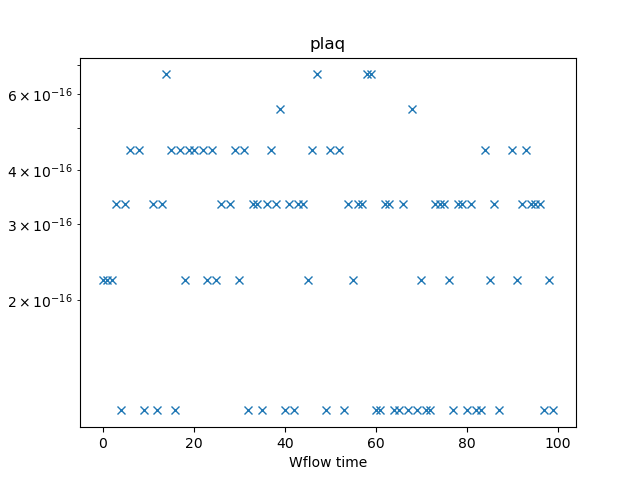

Labels 	rect	R

0 4.382653276024647826e-01 4.3826532760246456e-01 2.220446049250313e-16 5.066442425179485e-16
1 5.372038587142672350e-01 5.3720385871426701e-01 2.220446049250313e-16 4.1333397242616304e-16
2 6.204780039568685845e-01 6.2047800395686814e-01 4.440892098500626e-16 7.157211166520783e-16
3 6.876301889067705231e-01 6.8763018890677019e-01 3.3306690738754696e-16 4.843692332895879e-16
4 7.406544864947482987e-01 7.4065448649474797e-01 3.3306690738754696e-16 4.496926886433012e-16
5 7.822141264680216866e-01 7.8221412646802113e-01 5.551115123125783e-16 7.09666948638612e-16
6 8.148117325036700054e-01 8.1481173250366945e-01 5.551115123125783e-16 6.812757968112321e-16
7 8.405204950869923364e-01 8.4052049508699200e-01 3.3306690738754696e-16 3.9626268405635385e-16
8 8.609635544199106816e-01 8.6096355441991013e-01 5.551115123125783e-16 6.447561101312754e-16
9 8.773785709856313231e-01 8.7737857098563077e-01 5.551115123125783e-16 6.32693264537993e-16
10 8.906985222195152874e-01 8.90698522219

<IPython.core.display.Javascript object>


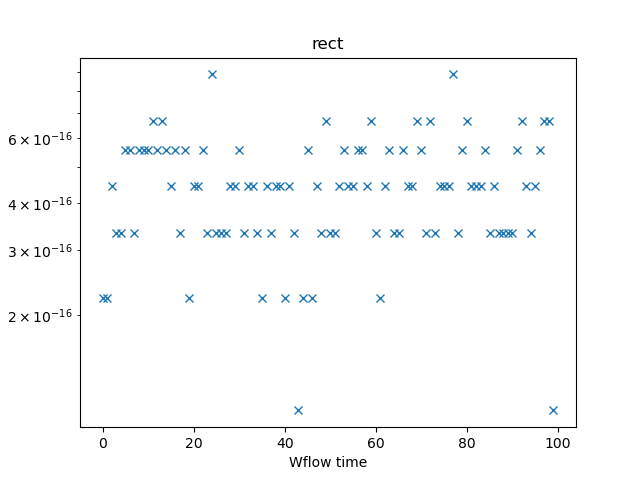

In [17]:
        
f_compare_values('r_ploop','polyTre',True,'ploop_re')
f_compare_values('i_ploop','polyTim',True,'ploop_im')
f_compare_values('plaq','P',True,'plaq')
f_compare_values('rect','R',True,'rect')

## Mismatch

In [18]:
# f_compare_values('plaq','t_P')
# f_compare_values('Clover_density','t_E')
# f_compare_values('rect','s_R')

Labels 	Clover_density	t2E

0 3.433535569160378262e-03 3.4168801924412025e-03 1.6655376719175788e-05 0.004850794868348668
1 1.252582054056944165e-02 1.2494130018601595e-02 3.1690521967846566e-05 0.002530015647693917
2 2.523973271083903083e-02 2.5204777576300200e-02 3.495513453883117e-05 0.0013849249094393115
3 3.982120127453404185e-02 3.9789264205940499e-02 3.193706859354328e-05 0.0008020116815001078
4 5.508924661656629945e-02 5.5062139628102663e-02 2.7106988463636295e-05 0.0004920558934542544
5 7.038185229614173088e-02 7.0359380089735191e-02 2.247220640654024e-05 0.0003192897838491833
6 8.539416722420184458e-02 8.5375514984187981e-02 1.8652240013863897e-05 0.0002184252229416625
7 1.000310546053964217e-01 1.0001536001833379e-01 1.569458706263127e-05 0.0001568971468364844
8 1.143051498007544714e-01 1.1429168655165146e-01 1.3463249103007335e-05 0.00011778339931731117
9 1.282753462496055152e-01 1.2826355852402879e-01 1.1787725576722918e-05 9.189392912481941e-05
10 1.420133030822288422e-01

<IPython.core.display.Javascript object>


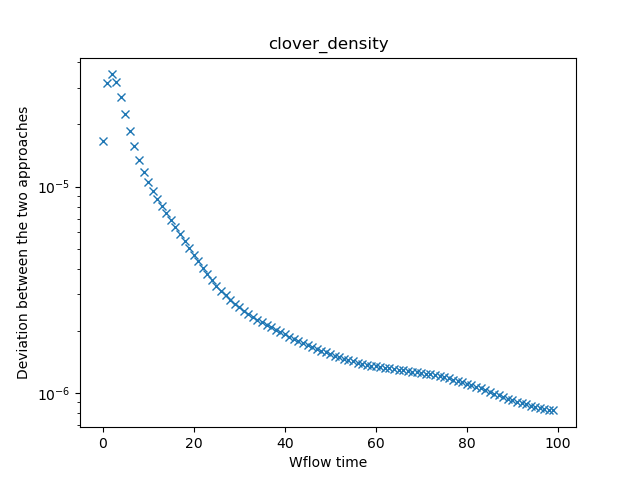

In [19]:
# f_compare_values('Clover_density','t_E')
# f_compare_values('Clover_density','s_E')
# f_compare_values('Clover_density','E')

f_compare_values('Clover_density','t2E',True,'clover_density')
# plt.savefig('clover_t2E.pdf')

In [20]:
# f_compare_values('Plaq_density','s_P','True','plaq_density')

Labels 	top_charge	Q

0 1.977304598783406142e+00 1.9822427154 -0.004938116616593824 -0.0024973980334805994
1 2.303105531544166418e+00 2.3046370877 -0.0015315561558337798 -0.0006649960824013631
2 2.491421606960693147e+00 2.4910118218 0.00040978516069323234 0.00016447844858868862
3 2.571168200013839389e+00 2.5704774001 0.0006907999138392462 0.000268671615429721
4 2.590616260322711195e+00 2.5903131785 0.00030308182271099326 0.0001169921718445628
5 2.583959038984191992e+00 2.5841018811 -0.00014284211580806172 -5.528033287409073e-05
6 2.566318960296945395e+00 2.5667622627 -0.0004433024030547905 -0.00017273862287308845
7 2.541049338034955696e+00 2.5416357065 -0.0005863684650444512 -0.00023075839428521354
8 2.507237737262370647e+00 2.5078554728 -0.0006177355376295601 -0.0002463809189088147
9 2.463779866814582498e+00 2.4643659163 -0.0005860494854172948 -0.00023786600958591216
10 2.410812376556710213e+00 2.4113397194 -0.000527342843289702 -0.0002187407234248937
11 2.349934844547378887e+00 2.350

<IPython.core.display.Javascript object>


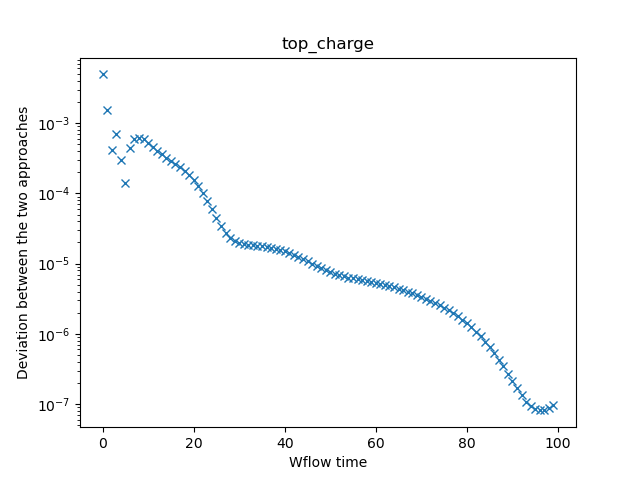

In [21]:
f_compare_values('top_charge','Q',True,'top_charge')
# plt.savefig('top_charge.pdf')